# GoldSpy Investments
GoldSpy Investments, An up and coming investment fund management took on a small client recently, who wanted to invest a small amount of capital with them. As a beginner to the financial markets he wanted to see if Gold or the S&P500 would be more of a sound investment for the future.

GoldSpy Investments will not present to the client, historical data on both markets, and show which investment is more volatile and lastly what the future may hold for each investment, which the client would then choose to invest in long term.




In [7]:
#import required libraries and dependencies.

import pandas as pd
from pathlib import Path
import os
from dotenv import load_dotenv
import requests
import json
import seaborn as sns
import numpy as np
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz
import hvplot.pandas
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
# Load .env enviroment variables into the notebook.
load_dotenv()

Python-dotenv could not parse statement starting at line 1


True

### Collect and enter LMBA Gold Stock Data Use pandas
create `read_csv` function and `Path` module to import data from `LMBAGOLD.csv` file and create a dataframe and post 10 most recent prices.

In [11]:
## Using the read_csv function and Path module, create a DataFrame 
# import information from "LBMAGOLD.csv"
lmba_gold_csv = Path("./Resources/LBMAGOLD.csv")

lmba_gold_df = pd.read_csv(
    lmba_gold_csv,
    # index_col='Date',
    # infer_datetime_format=True,
    # parse_dates=True,
)

columns = ['Date',
   'Open',
   'Close',
   'GBP (Open)',
   'GBP (Close)',
   'EURO (Open)',
   'EURO (Close)']
lmba_gold_df.columns = columns

del lmba_gold_df['Open']
del lmba_gold_df['GBP (Open)']
del lmba_gold_df['GBP (Close)']
del lmba_gold_df['EURO (Open)']
del lmba_gold_df['EURO (Close)']

lmba_gold_df
#review the first 10 and last 10 rows.
lmba_gold_df.head(10)
lmba_gold_df.tail(10)



,Date,Close
13799,1968-01-15,NaN
13800,1968-01-12,NaN
13801,1968-01-11,NaN
13802,1968-01-10,NaN
13803,1968-01-09,NaN
13804,1968-01-08,NaN
13805,1968-01-05,NaN
13806,1968-01-04,NaN
13807,1968-01-03,NaN
13808,1968-01-02,NaN


In [12]:
lmba_gold_df.sort_values(by='Date', ascending=True, inplace=True)

lmba_gold_split_2018 = lmba_gold_df.loc[
    (lmba_gold_df['Date'] >= "2015-12-01")
    & (lmba_gold_df['Date'] <= "2022-08-22")
]
# lmba_gold_df.sort_values(by='Date', ascending=True, inplace=True)
# lmba_gold_df.set_index('Date', inplace=True)
lmba_gold_split_2018.set_index('Date', inplace=True)

print(lmba_gold_split_2018.shape)

display(lmba_gold_split_2018.head(10))
display(lmba_gold_split_2018.tail(10))


(1698, 1)


,Close
Date,
2015-12-01,1065.40
2015-12-02,1055.40
2015-12-03,1055.45
2015-12-04,1079.25
2015-12-07,1075.80
2015-12-08,1072.10
2015-12-09,1081.00
2015-12-10,1071.00
2015-12-11,1072.50


,Close
Date,
2022-08-08,1784.05
2022-08-09,1795.25
2022-08-10,1795.05
2022-08-11,1796.70
2022-08-12,1792.10
2022-08-15,1776.60
2022-08-16,1774.85
2022-08-17,1767.20
2022-08-18,1765.55


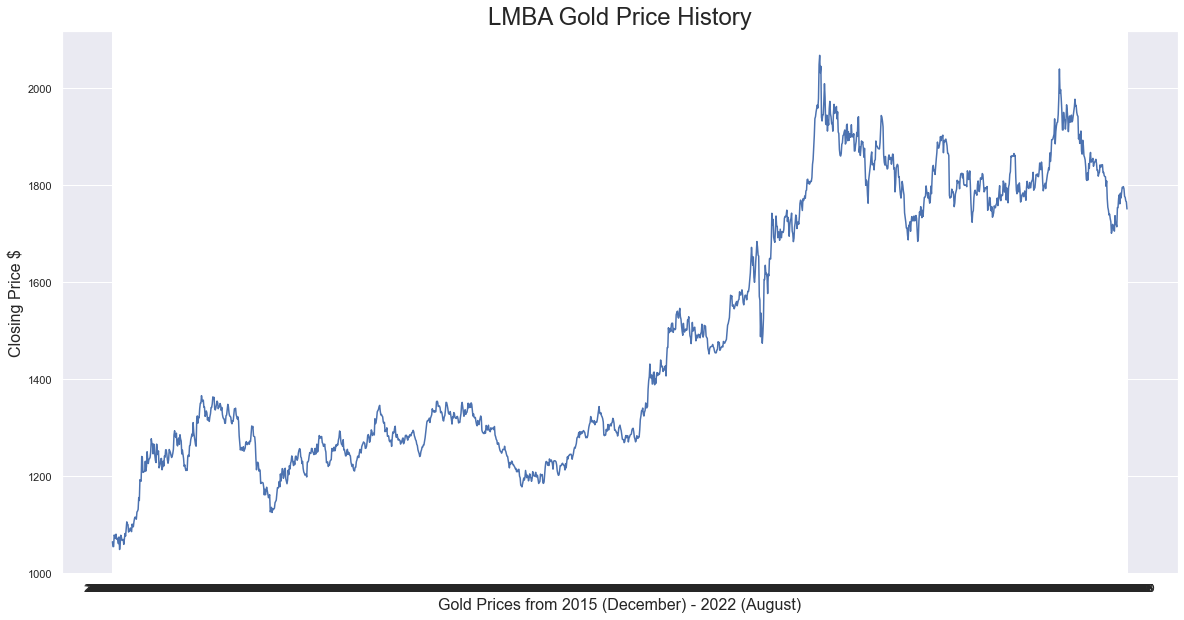

In [17]:
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Gold Prices from 2015 (December) - 2022 (August)", size = 16)
plt.ylabel("Closing Price $", size = 16)
plt.title("LMBA Gold Price History", size = 24)
lmba_sense = sns.lineplot(x = "Date", y ="Close", data = lmba_gold_split_2018, ci=False, markers=True

)


# Alpaca Spy Data


In [ ]:
#import important libraries
import pandas as pd
import os
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import requests
import hvplot.pandas
import json

#load dotenv for API 

load_dotenv()


# Create a .env folder with Alpaca API key and Alpaca secret key.

Set variables for Alpaca API and Alpaca secret keys.


call API keys using os.getenv 


Create tradeapi.REST object with the Alpaca key and secret keys along with version number.

In [ ]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")
alpaca_base_url = "https://paper-api.alpaca.markets"
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

#create alpaca api object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


# Pull timestamp from 2015-12-01 to end 2022-08-22


In [ ]:
#format current date as iso format for ticker SPY
#7 year time period

start_date = pd.Timestamp("2015-12-01",tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-08-22",tz="America/New_York").isoformat()

#set spy ticker

tickers = ["SPY"]

#set timeframe to ('1Day') for alpaca api 
timeframe = '1D'

In [ ]:
#closing price for SPY

alpaca_spy_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

alpaca_spy_df

# Drop the SPY symbol to clean dataframe by dropping the symbol 

In [ ]:
#close price for SPY 

SPY = alpaca_spy_df[alpaca_spy_df['symbol']=='SPY'].drop('symbol',axis=1)

alpaca_spy_df = pd.concat([SPY],axis=1,keys=['SPY'])
display(alpaca_spy_df.head())
display(alpaca_spy_df.tail())


# Create SPY closing dataframe by slicing close column in the Spy dataframe

In [ ]:
#get closing price for SPY from Alpaca DF


spy_close_df =(alpaca_spy_df['SPY']['close'])
spy_close_df


# Plot the close price for SPY historical data 2015-2022

In [ ]:
#SPY Historical Data Last 7 Years
spy_close_df.hvplot(
    y='close',
    title='SPY Historical Data 2015-2022',
    xlabel='Year 2015-2022',
    ylabel='SPY Volume'
).opts(
    yformatter='%.0f',
    color='green'
)

In [ ]:
#\